<a href="https://colab.research.google.com/github/DamiSoh/Personal_Project/blob/main/AI_04_%E1%84%89%E1%85%A9%E1%84%83%E1%85%A1%E1%86%B7_section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 클렌징

1. NA 제거 
2. 수치 데이터 정리하기
3. 이상치 처리


In [244]:
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2 (2).csv


In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [246]:
games = pd.read_csv('vgames2.csv', index_col=0) 
games.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [247]:
games = games.reset_index(drop = True)
games.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [248]:
games.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [249]:
games.isnull().sum().sort_values(ascending = False)

Year           271
Publisher       58
Genre           50
Other_Sales      0
JP_Sales         0
EU_Sales         0
NA_Sales         0
Platform         0
Name             0
dtype: int64

## 1. NA 제거

In [250]:
#na 데이터 제거
games.dropna(how ='any', inplace = True, axis = 0)
games.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


## 2. 수치데이터 표기 맞추기 

In [251]:
#판매량  Values에 480K 등 K, M 수치 데이터 포함 확인
games.loc[[10]]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001.0,Racing,Empire Interactive,480K,0.33M,0K,0.06


In [252]:
#처리위해 obj -> float화 및 수치데이터 정렬하기

def values_to_float(x):
  if 'K' in x:
    if len(x) > 1:
      return float(x.replace('K', ''))*1000
    return 1000.0
  if 'M' in x:
    if len(x) >1:
      return float(x.replace('M', ''))*1000000
    return 1000000.0
  else:
    return float(x) * 1000000.0


In [253]:
cols = games.columns[5:]

for name in cols:
  games[name] = games[name].apply(values_to_float)

In [254]:
#확인
games.loc[[10]]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001.0,Racing,Empire Interactive,480000.0,330000.0,0.0,60000.0


## 3. 이상치 - Year Feature 정리하기

In [255]:
#그래프로 데이터 확인 위해 Tidy화
tidy_sales = games.melt(id_vars = ['Name', 'Platform', 'Year', 'Genre', 'Publisher'], var_name = 'region', value_name ='sales')
tidy_sales

,Name,Platform,Year,Genre,Publisher,region,sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,NA_Sales,40000.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,NA_Sales,170000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,NA_Sales,0.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,NA_Sales,40000.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,NA_Sales,120000.0
...,...,...,...,...,...,...,...
64959,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,Other_Sales,10000.0
64960,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,Other_Sales,0.0
64961,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,Other_Sales,130000.0
64962,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,Other_Sales,30000.0


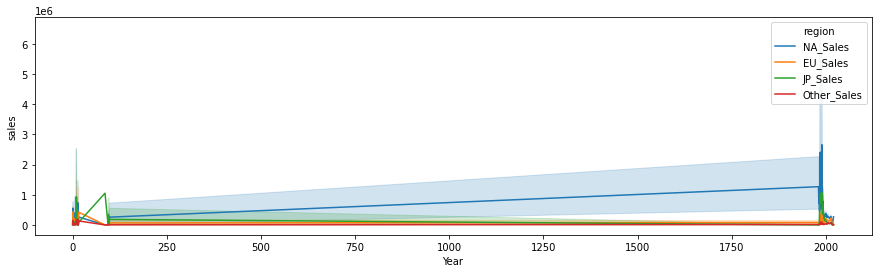

In [256]:
#Year에서 이상치 확인: 0과 가까운 범위에 데이터 발견

plt.figure(figsize = (15,4))
sns.lineplot( x= 'Year', y ='sales', hue = 'region', data = tidy_sales);

(0.0, 150.0)

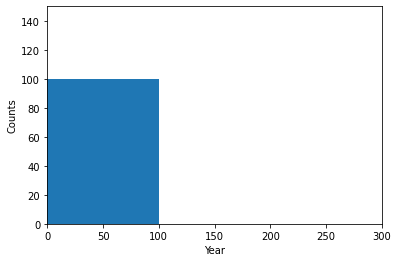

In [257]:
#Histogram으로 다시 확인
plt.hist('Year', data = games, bins = (0,100))
plt.xlabel('Year')
plt.ylabel('Counts');
plt.xlim(0,300)
plt.ylim(0,150)

In [258]:
#Numeric 외 다른 열도 확인

print('genre', games.Genre.unique())
print('Publisher', games.Publisher.unique())
print('Platform', games.Platform.unique()) 

#다른 열에는 이상치 없는 것으로 확인 

genre ['Action' 'Adventure' 'Misc' 'Platform' 'Sports' 'Simulation' 'Racing'
 'Role-Playing' 'Puzzle' 'Strategy' 'Fighting' 'Shooter']
Publisher ['Destineer' 'Namco Bandai Games' 'Alchemist' 'Zoo Games' 'D3Publisher'
 'Konami Digital Entertainment' 'Deep Silver' 'Tecmo Koei' 'Sega' 'THQ'
 'Empire Interactive' 'Ubisoft' 'Paradox Interactive' '505 Games'
 'Tomy Corporation' 'Eidos Interactive' 'Microsoft Game Studios'
 'Nippon Ichi Software' 'Kalypso Media' 'Electronic Arts'
 'Sony Computer Entertainment' 'Activision' 'Tru Blu Entertainment'
 'Warner Bros. Interactive Entertainment' 'Midway Games' 'Mindscape'
 'Wargaming.net' 'Capcom' 'Acclaim Entertainment' 'Unknown' 'Nintendo'
 'Disney Interactive Studios' 'Crave Entertainment' 'Sunflowers'
 'Arc System Works' 'Milestone S.r.l' 'Kamui' 'Hudson Soft' 'Square Enix'
 'Focus Home Interactive' 'Take-Two Interactive' 'Game Factory'
 'Takara Tomy' 'SquareSoft' 'Global Star' 'Infogrames' 'GT Interactive'
 'Storm City Games' 'Gathering of Devel

In [259]:
#Year 이상치 정리하기 값이 300 이하인 데이터 확인 (토탈 100행)
condition = (games['Year'] < 300)
df_year = games[condition]
df_year

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
74,Age of Empires III: Complete Collection,PC,9.0,Strategy,Microsoft Game Studios,10000.0,120000.0,0.0,30000.0
81,Treasures of the Deep,PS,97.0,Action,Namco Bandai Games,100000.0,70000.0,0.0,10000.0
213,NASCAR Unleashed,PS3,11.0,Racing,Activision,90000.0,0.0,0.0,10000.0
304,Kung Fu Panda: Showdown of Legendary Legends,PS3,15.0,Action,Little Orbit,0.0,20000.0,0.0,0.0
768,NASCAR Thunder 2004,PS2,3.0,Racing,Electronic Arts,530000.0,410000.0,0.0,140000.0
...,...,...,...,...,...,...,...,...,...
15985,Sugoi Hebereke,SNES,94.0,Fighting,Sunsoft,0.0,0.0,20000.0,0.0
16103,Fab 5 Soccer,DS,8.0,Sports,Destineer,10000.0,0.0,0.0,0.0
16149,Dragon Ball Z: Burst Limit,X360,8.0,Fighting,Atari,240000.0,180000.0,30000.0,50000.0
16394,Point Blank 3,PS,0.0,Shooter,Namco Bandai Games,10000.0,10000.0,0.0,0.0


In [260]:
df_year.sort_values(by = ['Year']) #0 ~ 98까지 이상치 데이터 확인 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9276,Trade & Battle: Card Hero,GB,0.0,Strategy,Nintendo,0.0,0.0,200000.0,0.0
14666,Strider 2,PS,0.0,Platform,Virgin Interactive,50000.0,30000.0,0.0,10000.0
16394,Point Blank 3,PS,0.0,Shooter,Namco Bandai Games,10000.0,10000.0,0.0,0.0
2249,SplashDown,PS2,1.0,Racing,Atari,340000.0,270000.0,0.0,90000.0
8681,NCAA Football 2002,PS2,1.0,Sports,Electronic Arts,770000.0,600000.0,0.0,200000.0
...,...,...,...,...,...,...,...,...,...
10315,AeroFighters Assault,N64,97.0,Action,Video System,150000.0,40000.0,0.0,0.0
81,Treasures of the Deep,PS,97.0,Action,Namco Bandai Games,100000.0,70000.0,0.0,10000.0
14572,S.C.A.R.S,PS,98.0,Racing,Ubisoft,50000.0,30000.0,0.0,10000.0
3492,Glover,N64,98.0,Platform,Hasbro Interactive,720000.0,170000.0,0.0,10000.0


In [261]:
df_year.loc[[9276]] #게임명 Trade & Battle: Card Hero 출시연도: 2000(위키피디아 참고), 따라서 Year: 0은 2000년으로 추론, 현재 2021년이므로 0 ~ 21년 이하 데이터는 20xx년d으로 정리.

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9276,Trade & Battle: Card Hero,GB,0.0,Strategy,Nintendo,0.0,0.0,200000.0,0.0


In [262]:
df_year.loc[[10315]] #게임명 AeroFighters Assault 출시연도: 1997(위키피디아 참고), 따라서 Year: 97은 1997년으로 정리. 22 ~99까지의 데이터는 19xx년으로 정리하고자함.

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10315,AeroFighters Assault,N64,97.0,Action,Video System,150000.0,40000.0,0.0,0.0


In [263]:
df_year.loc[[9276,10315]]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9276,Trade & Battle: Card Hero,GB,0.0,Strategy,Nintendo,0.0,0.0,200000.0,0.0
10315,AeroFighters Assault,N64,97.0,Action,Video System,150000.0,40000.0,0.0,0.0


In [264]:
def year_recalibration (x):
  if x >= 100:
    return x
  elif x < 100:
    if x < 21:
      x = 2000 + x
      return x
    else:
      x = 1900 + x
      return x

In [265]:
games_EDA = games.copy()

In [266]:
games_EDA['Year'] = games_EDA['Year'].apply(year_recalibration)

In [267]:
games_EDA.loc[[9276,10315]] #변경내역 확인 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9276,Trade & Battle: Card Hero,GB,2000.0,Strategy,Nintendo,0.0,0.0,200000.0,0.0
10315,AeroFighters Assault,N64,1997.0,Action,Video System,150000.0,40000.0,0.0,0.0


In [268]:
year_sales = games_EDA.groupby('Year').NA_Sales.sum()
year_sales  = pd.DataFrame(year_sales)

In [269]:
year_sales['EU_Sales'] = games_EDA.groupby('Year').EU_Sales.sum()
year_sales['JP_Sales'] = games_EDA.groupby('Year').JP_Sales.sum()
year_sales['Other_Sales'] = games_EDA.groupby('Year').Other_Sales.sum()
year_sales = year_sales.reset_index()

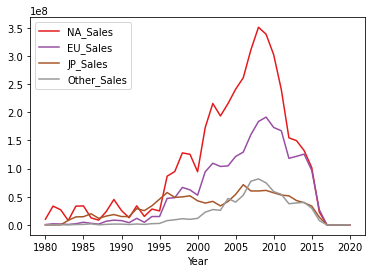

In [270]:
year_sales.plot(x = 'Year', cmap = 'Set1');

In [271]:
tidy_df = games_EDA.melt(id_vars = ['Name', 'Platform', 'Year', 'Genre', 'Publisher'], var_name = 'region', value_name ='sales')
tidy_df

,Name,Platform,Year,Genre,Publisher,region,sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,NA_Sales,40000.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,NA_Sales,170000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,NA_Sales,0.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,NA_Sales,40000.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,NA_Sales,120000.0
...,...,...,...,...,...,...,...
64959,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,Other_Sales,10000.0
64960,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,Other_Sales,0.0
64961,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,Other_Sales,130000.0
64962,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,Other_Sales,30000.0


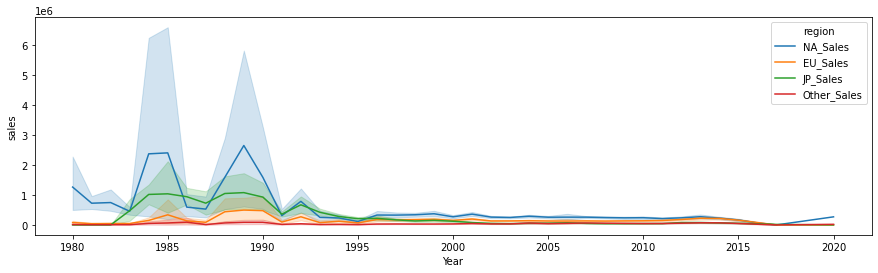

In [272]:
plt.figure(figsize = (15,4))
sns.lineplot( x= 'Year', y ='sales', hue = 'region', data = tidy_df);

#공통과제

1. 지역에 따라서 선호하는 게임 장르가 다를까
2. 연도별 게임의 트렌드가 있을까
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

## 2 -1. 지역에 따라 선호하는 게임 장르가 다를까 ? - 카이제곱 검정


In [273]:
games_EDA.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16241.000000,1.624100e+04,1.624100e+04,1.624100e+04,1.624100e+04
mean,2006.406748,2.651955e+05,1.473782e+05,7.828274e+04,4.823410e+04
std,5.832087,8.224307e+05,5.083397e+05,3.092720e+05,1.896780e+05
min,1980.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2003.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2007.000000,8.000000e+04,2.000000e+04,0.000000e+00,1.000000e+04
75%,2010.000000,2.400000e+05,1.100000e+05,4.000000e+04,4.000000e+04
max,2020.000000,4.149000e+07,2.902000e+07,1.022000e+07,1.057000e+07


In [274]:
# 범주형 데이터인 지역(변수1)과, 범주형 데이터인 게임 장르(변수2)의 연관성(선호도)을 파악하는 것이므로 카이제곱겅정을 통하여 확인한다.
# 귀무가설: 지역과 선호 게임장르는 독립적이다 < - > 대립가설: 지역과 게임장르 선호도에 연관성이 있을 것이다 
# 데이터 정리 

In [275]:
games_EDA.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000.0,0.0,0.0,0.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0


In [276]:
assignment1 = games_EDA[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
assignment1.set_index('Genre')


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,40000.0,0.0,0.0,0.0
Action,170000.0,0.0,0.0,10000.0
Adventure,0.0,0.0,20000.0,0.0
Misc,40000.0,0.0,0.0,0.0
Platform,120000.0,90000.0,0.0,40000.0
...,...,...,...,...
Platform,150000.0,40000.0,0.0,10000.0
Action,10000.0,0.0,0.0,0.0
Sports,440000.0,190000.0,30000.0,130000.0


In [277]:
assignment1 = assignment1.groupby('Genre').sum()
assignment1

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,858750000.0,513640000.0,156600000.0,183990000.0
Adventure,101790000.0,63660000.0,51870000.0,16700000.0
Fighting,220350000.0,99900000.0,87140000.0,36150000.0
Misc,394730000.0,208150000.0,104180000.0,72640000.0
Platform,445380000.0,200630000.0,130530000.0,51450000.0
Puzzle,121580000.0,50470000.0,56240000.0,12440000.0
Racing,354700000.0,235020000.0,56320000.0,76510000.0
Role-Playing,318760000.0,183090000.0,342930000.0,56730000.0
Shooter,574480000.0,310230000.0,38180000.0,101860000.0


In [278]:
from scipy.stats import chi2_contingency

chi2_contingency(assignment1)

#1. p-value가 0.05 이하이므로 귀무가설 기각, 대안가설 채택 : 지역과 게임장르는 연관성이 있다.

(684336340.5169278,
 0.0,
 33,
 array([[8.42668371e+08, 4.68299745e+08, 2.48746271e+08, 1.53265612e+08],
        [1.15121748e+08, 6.39771079e+07, 3.39826515e+07, 2.09384923e+07],
        [2.18191181e+08, 1.21256330e+08, 6.44075945e+07, 3.96848939e+07],
        [3.83558786e+08, 2.13156786e+08, 1.13222261e+08, 6.97621676e+07],
        [4.07314145e+08, 2.26358455e+08, 1.20234577e+08, 7.40828230e+07],
        [1.18422607e+08, 6.58115084e+07, 3.49570281e+07, 2.15388567e+07],
        [3.55444916e+08, 1.97532943e+08, 1.04923361e+08, 6.46487805e+07],
        [4.43480930e+08, 2.46457579e+08, 1.30910607e+08, 8.06608845e+07],
        [5.04106536e+08, 2.80149309e+08, 1.48806607e+08, 9.16875480e+07],
        [1.91498992e+08, 1.06422565e+08, 5.65283591e+07, 3.48300841e+07],
        [6.42137522e+08, 3.56857867e+08, 1.89551809e+08, 1.16792802e+08],
        [8.50942655e+07, 4.72898048e+07, 2.51188747e+07, 1.54770550e+07]]))

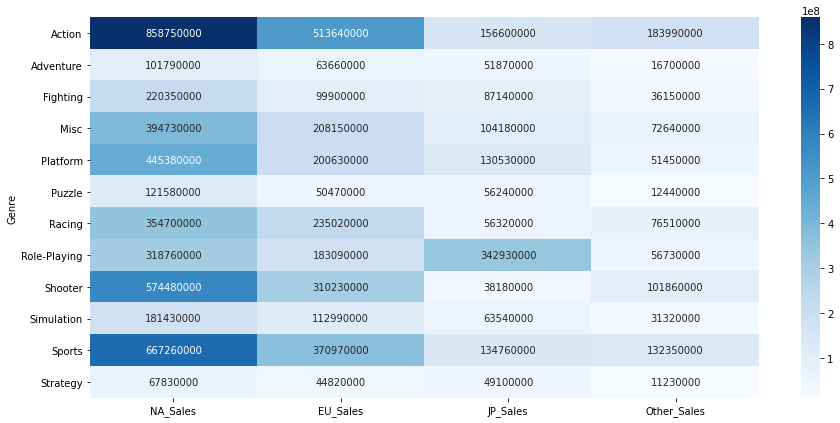

In [279]:
plt.figure(figsize = (15,7))
sns.heatmap(assignment1, cmap='Blues', annot = True, fmt = '.0f');
#2 - 하기와 같이 북아메리카, 유럽, 일본 및 타 세일즈 지역별 선호하는 게임 장르를 확인할 수 있다

## 2 -2. 연도별 게임의 트렌드가 있을까 ? - 시각화와 카이제곱 검정

데이터 항목 중 게임 트렌드를 점치는 항목으로 추측되는 
게임 장르(Genre), 플랫폼(Platform)의 변화를 Tracing 해보자

In [280]:
games_EDA.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16241.000000,1.624100e+04,1.624100e+04,1.624100e+04,1.624100e+04
mean,2006.406748,2.651955e+05,1.473782e+05,7.828274e+04,4.823410e+04
std,5.832087,8.224307e+05,5.083397e+05,3.092720e+05,1.896780e+05
min,1980.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2003.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2007.000000,8.000000e+04,2.000000e+04,0.000000e+00,1.000000e+04
75%,2010.000000,2.400000e+05,1.100000e+05,4.000000e+04,4.000000e+04
max,2020.000000,4.149000e+07,2.902000e+07,1.022000e+07,1.057000e+07


In [281]:
games_EDA['Total_Sales'] = games_EDA[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis = 1)
games_EDA.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000.0,0.0,0.0,0.0,40000.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0,180000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0,20000.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0,40000.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0,250000.0


In [282]:
#1980부터 2020까지 10년 주기로 년대별로 범주화

def category_year (x):
  if x >= 1980 and x < 1990:
    x = 1980
    return x
  elif x >= 1990 and x <2000:
    x = 1990
    return x
  elif x >= 2000 and x <2010:
    x = 2000
    return x
  elif x >= 2010 and x < 2020:
    x = 2010
    return x
  else:
    x = 2020
    return x

### 2-2-(1) 게임 장르 특성 시각화 & 검정


In [283]:
#게임 장르 feature 시각화 & 검정

Genre_Sum = games_EDA.copy()
Genre_Sum['Year'] = Genre_Sum['Year'].apply(category_year)
Genre_Sum.sample(100)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
4145,Shrek SuperSlam,DS,2000,Action,Activision,170000.0,0.0,0.0,10000.0,180000.0
16434,Utawarerumono Portable,PSP,2000,Role-Playing,Aqua Plus,0.0,0.0,30000.0,0.0,30000.0
3762,Astro Boy: The Video Game,PS2,2000,Action,D3Publisher,50000.0,40000.0,0.0,10000.0,100000.0
3938,Disney Sing It: Pop Hits,Wii,2000,Misc,Disney Interactive Studios,1080000.0,280000.0,0.0,130000.0,1490000.0
6776,OK! Puzzle Stars,DS,2010,Puzzle,Ubisoft,0.0,60000.0,0.0,10000.0,70000.0
...,...,...,...,...,...,...,...,...,...,...
11278,Tony Hawk's Pro Skater 3,N64,2000,Sports,Activision,60000.0,20000.0,0.0,0.0,80000.0
1767,Samurai Warriors 2,X360,2000,Action,Tecmo Koei,70000.0,10000.0,0.0,10000.0,90000.0
15555,DragonHeart: Fire & Steel,PS,1990,Action,Acclaim Entertainment,20000.0,10000.0,0.0,0.0,30000.0
2731,Manhunt,XB,2000,Action,Take-Two Interactive,140000.0,40000.0,0.0,10000.0,190000.0


In [284]:
year_genre = pd.DataFrame(Genre_Sum.groupby(['Year', 'Genre']).Total_Sales.sum())
year_genre = year_genre.unstack()
year_genre = year_genre.replace(np.nan, 0)
year_genre.columns = year_genre.columns.droplevel(0)
year_genre.columns

Index(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'],
      dtype='object', name='Genre')

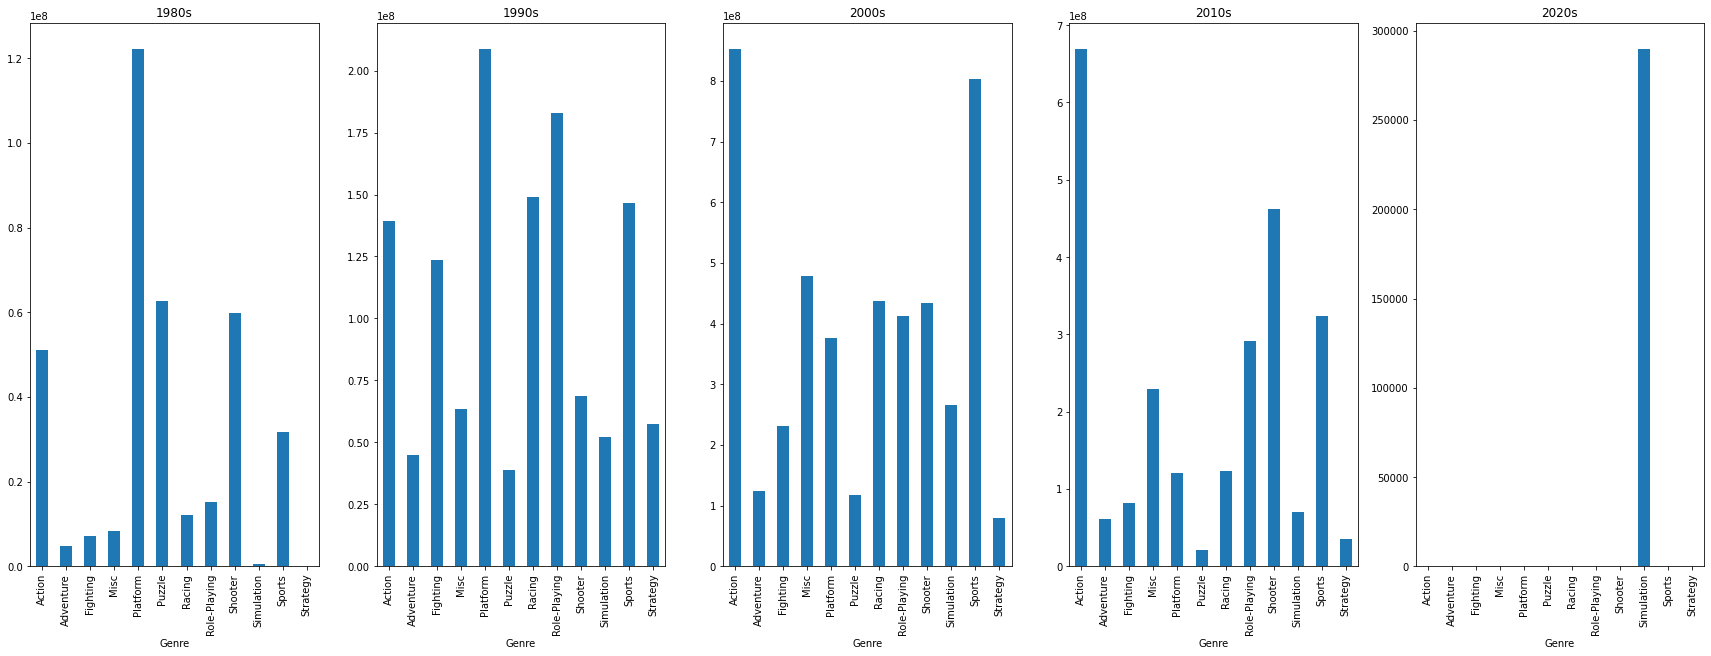

In [285]:
numbers = [0,1,2,3,4]

plt.figure(figsize = (30,10))

for index in numbers:
  plots = year_genre.iloc[index][:]
  year = 1980 + 10*int(index)
  plt.subplot(150+(int(index)+1))
  plots.plot(kind='bar')
  plt.title(str(year)+'s')

plt.show();

### 2-2-(2) 게임 플랫폼 특성 시각화 & 검정




In [286]:
#게임 플랫폼(Feature) 시각화 & 검정

Platform_Sum = games_EDA.copy()
Platform_Sum['Year'] = Platform_Sum['Year'].apply(category_year)
Platform_Sum.sample(100)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
14251,Post Mortem,PC,2000,Adventure,Microids,0.0,10000.0,0.0,0.0,10000.0
672,Star Wars The Clone Wars: Lightsaber Duels,Wii,2000,Action,LucasArts,1230000.0,300000.0,0.0,140000.0,1670000.0
746,Super Bust-A-Move,PS2,2000,Puzzle,Acclaim Entertainment,170000.0,130000.0,0.0,40000.0,340000.0
6521,Enduro,2600,1980,Misc,Quelle,810000.0,50000.0,0.0,10000.0,870000.0
332,Coronation Street: The Mystery of the Missing ...,PC,2010,Adventure,Avanquest,0.0,10000.0,0.0,0.0,10000.0
...,...,...,...,...,...,...,...,...,...,...
15373,Suzumiya Haruhi no Tomadoi,PS2,2000,Adventure,Banpresto,0.0,0.0,130000.0,0.0,130000.0
15237,Fritz Chess,DS,2000,Strategy,Deep Silver,20000.0,0.0,0.0,0.0,20000.0
4312,Cabbage Patch Kids: The Patch Puppy Rescue,GBA,2000,Misc,D3Publisher,10000.0,0.0,0.0,0.0,10000.0
10325,Stronghold Crusader Extreme,PC,2000,Strategy,Gamecock,0.0,20000.0,0.0,0.0,20000.0


In [287]:
year_platform = pd.DataFrame(Platform_Sum.groupby(['Year', 'Platform']).Total_Sales.sum())
year_platform = year_platform.unstack()
year_platform = year_platform.replace(np.nan, 0)
year_platform.columns = year_platform.columns.droplevel(0)
year_platform.columns

Index(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64',
       'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV',
       'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB',
       'XOne'],
      dtype='object', name='Platform')

In [288]:
year_platform.head()

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980,85980000.0,0.0,0.0,0.0,20000.0,66400000.0,0.0,0.0,0.0,0.0,0.0,223510000.0,0.0,70000.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1990,0.0,100000.0,0.0,8540000.0,0.0,159030000.0,0.0,0.0,28350000.0,40000.0,179550000.0,27540000.0,1440000.0,49960000.0,30000.0,584500000.0,0.000000e+00,0.0,0.0,0.0,0.0,33590000.0,1860000.0,200040000.0,160000.0,460000.0,0.0,0.0,0.0,0.0,0.0
2000,0.0,0.0,0.0,7410000.0,687570000.0,29000000.0,304760000.0,196020000.0,0.0,0.0,37210000.0,0.0,0.0,83440000.0,0.0,140660000.0,1.216870e+09,345550000.0,0.0,226530000.0,0.0,0.0,0.0,0.0,0.0,960000.0,676690000.0,0.0,412450000.0,247300000.0,0.0
2010,0.0,0.0,231820000.0,0.0,129310000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,119480000.0,0.0,0.0,5.570000e+06,601190000.0,275780000.0,64310000.0,61560000.0,0.0,0.0,0.0,0.0,0.0,223460000.0,81790000.0,556140000.0,0.0,141080000.0
2020,0.0,0.0,0.0,0.0,290000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [339]:
year_platform.loc['Total'] = year_platform.loc[[1980,1990,2000,2010,2020]].sum(axis =0)

In [340]:
year_platform

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980,85980000.0,0.0,0.0,0.0,20000.0,66400000.0,0.0,0.0,0.0,0.0,0.0,223510000.0,0.0,70000.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1990,0.0,100000.0,0.0,8540000.0,0.0,159030000.0,0.0,0.0,28350000.0,40000.0,179550000.0,27540000.0,1440000.0,49960000.0,30000.0,584500000.0,0.000000e+00,0.0,0.0,0.0,0.0,33590000.0,1860000.0,200040000.0,160000.0,460000.0,0.0,0.0,0.0,0.0,0.0
2000,0.0,0.0,0.0,7410000.0,687570000.0,29000000.0,304760000.0,196020000.0,0.0,0.0,37210000.0,0.0,0.0,83440000.0,0.0,140660000.0,1.216870e+09,345550000.0,0.0,226530000.0,0.0,0.0,0.0,0.0,0.0,960000.0,676690000.0,0.0,412450000.0,247300000.0,0.0
2010,0.0,0.0,231820000.0,0.0,129310000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,119480000.0,0.0,0.0,5.570000e+06,601190000.0,275780000.0,64310000.0,61560000.0,0.0,0.0,0.0,0.0,0.0,223460000.0,81790000.0,556140000.0,0.0,141080000.0
2020,0.0,0.0,0.0,0.0,290000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Total,85980000.0,100000.0,231820000.0,15950000.0,817190000.0,254430000.0,304760000.0,196020000.0,28350000.0,40000.0,216760000.0,251050000.0,1440000.0,252950000.0,30000.0,725160000.0,1.222440e+09,946740000.0,275780000.0,290840000.0,61560000.0,33590000.0,1860000.0,200040000.0,160000.0,1420000.0,900150000.0,81790000.0,968590000.0,247300000.0,141080000.0


In [356]:
year_platform2 = year_platform.transpose().sort_values(by = 'Total', ascending = False)
year_platform2 = year_platform2.iloc[:, :-1]
year_platform2.iloc[:11]

Year,1980,1990,2000,2010,2020
Platform,,,,,
PS2,0.0,0.0,1.216870e+09,5570000.0,0.0
X360,0.0,0.0,4.124500e+08,556140000.0,0.0
PS3,0.0,0.0,3.455500e+08,601190000.0,0.0
Wii,0.0,0.0,6.766900e+08,223460000.0,0.0
DS,20000.0,0.0,6.875700e+08,129310000.0,290000.0
PS,0.0,584500000.0,1.406600e+08,0.0,0.0
GBA,0.0,0.0,3.047600e+08,0.0,0.0
PSP,0.0,0.0,2.265300e+08,64310000.0,0.0
PS4,0.0,0.0,0.000000e+00,275780000.0,0.0


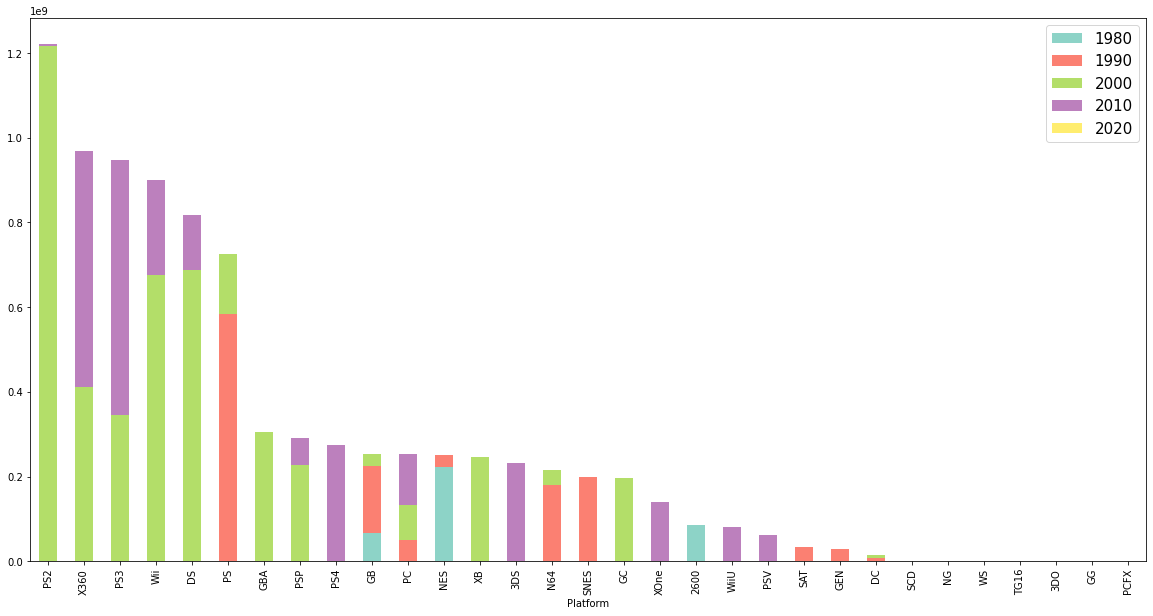

In [374]:
year_platform2.plot(kind = 'bar', figsize = [20,10], cmap = 'Set3',stacked = True)
plt.legend(prop={'size': 15});

In [362]:
year_platform = year_platform.loc[[1980,1990,2000,2010,2020]]
year_platform

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980,85980000.0,0.0,0.0,0.0,20000.0,66400000.0,0.0,0.0,0.0,0.0,0.0,223510000.0,0.0,70000.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1990,0.0,100000.0,0.0,8540000.0,0.0,159030000.0,0.0,0.0,28350000.0,40000.0,179550000.0,27540000.0,1440000.0,49960000.0,30000.0,584500000.0,0.000000e+00,0.0,0.0,0.0,0.0,33590000.0,1860000.0,200040000.0,160000.0,460000.0,0.0,0.0,0.0,0.0,0.0
2000,0.0,0.0,0.0,7410000.0,687570000.0,29000000.0,304760000.0,196020000.0,0.0,0.0,37210000.0,0.0,0.0,83440000.0,0.0,140660000.0,1.216870e+09,345550000.0,0.0,226530000.0,0.0,0.0,0.0,0.0,0.0,960000.0,676690000.0,0.0,412450000.0,247300000.0,0.0
2010,0.0,0.0,231820000.0,0.0,129310000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,119480000.0,0.0,0.0,5.570000e+06,601190000.0,275780000.0,64310000.0,61560000.0,0.0,0.0,0.0,0.0,0.0,223460000.0,81790000.0,556140000.0,0.0,141080000.0
2020,0.0,0.0,0.0,0.0,290000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


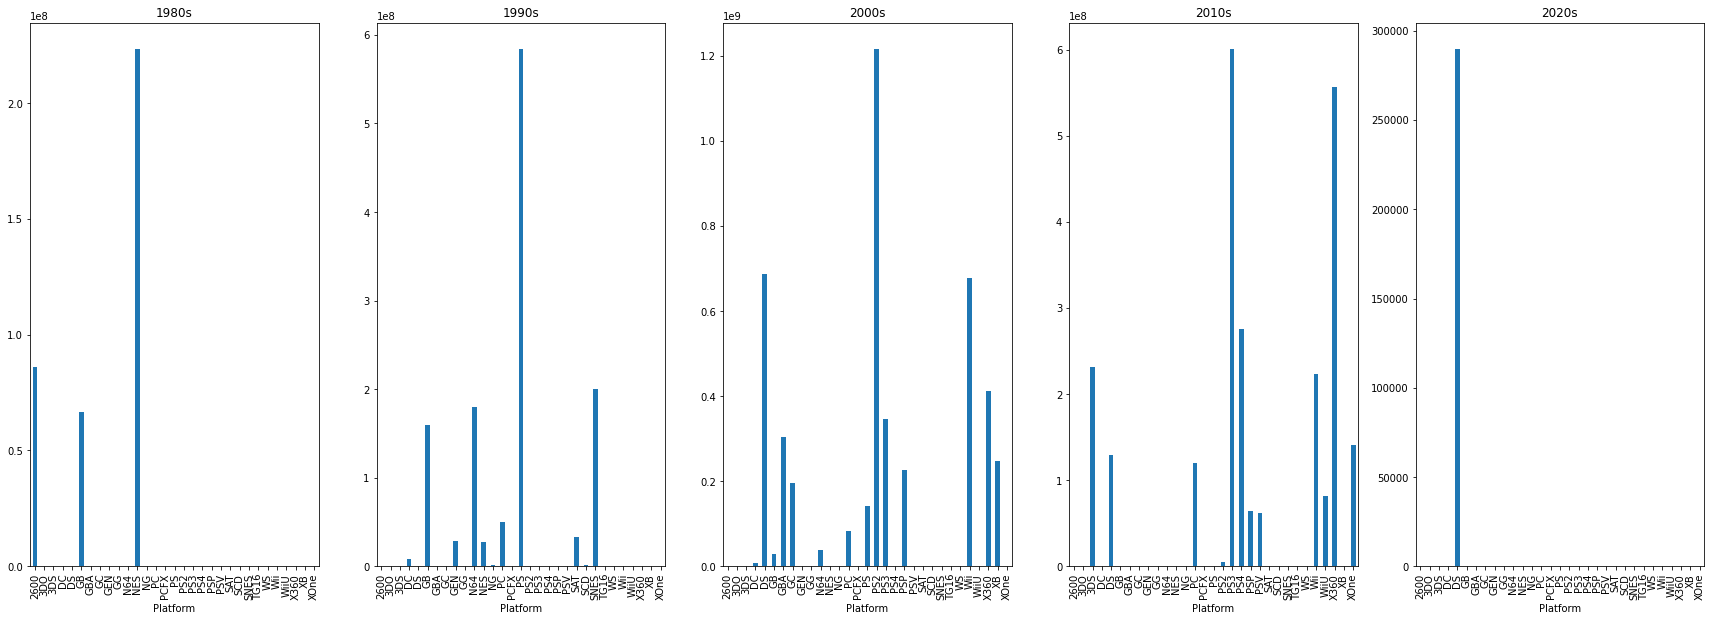

In [363]:
numbers = [0,1,2,3,4]

plt.figure(figsize = (30,10))

for index in numbers:
  plots = year_platform.iloc[index][:]
  year = 1980 + 10*int(index)
  plt.subplot(150+(int(index)+1))
  plots.plot(kind='bar')
  plt.title(str(year)+'s')

plt.show();

#1980에 가장 판매량이 높던 플랫폼 '2600'은 그 다음10개년도에서 자취를 감추었고, 1980년대에 없던 'PS'는 그 1990년대에 가장 높은 매출을 기록하였다. 
#또 과거에는 특정 플랫폼의 게임이 판매 실적을 거둔반면, 1990이후에는 플랫폼이 다각화된 모습을 볼 수 있다. 소비자의 다양한 플랫폼 니즈를 충족한 것으로 생각해볼 수 있다. (물론 출시연도 후에도 계속 흥행하고 있을 가능성도 배제할 수는 없겠다 - 다른 데이터 확인 필요)

In [290]:
#연도에 따라 실제 플랫폼에도 영향을 미치는지 카이제곱 검정을 통해 상관관계/독립성을 알아보고자 한다.
#출고량이 1980년부터 2020년까지 기록되는 데이터는 없으므로, 가장 긴 기간동안 데이터를 가지고 있는 플랫폼과, 해당 기간을 찾아보고자 한다

chi_test = games_EDA[['Platform', 'Year', 'Genre', 'Total_Sales']]

In [291]:
condition_chi = ( (chi_test['Platform'] == 'PC') | (chi_test['Platform'] == 'PS3') | (chi_test['Platform'] == 'PS2') | (chi_test['Platform'] == 'Wii') | (chi_test['Platform'] == 'X360') )
chi_test_data = chi_test.loc[condition_chi]

In [292]:
chi_test_data

,Platform,Year,Genre,Total_Sales
1,Wii,2009.0,Action,180000.0
4,PS3,2010.0,Platform,250000.0
6,PC,2011.0,Simulation,30000.0
8,PS3,2007.0,Adventure,40000.0
9,PS3,2011.0,Action,80000.0
...,...,...,...,...
16583,Wii,2009.0,Action,1430000.0
16588,PS3,2011.0,Shooter,180000.0
16590,PS3,2010.0,Adventure,50000.0
16591,PS2,2004.0,Sports,4530000.0


In [293]:
chi_test_data = chi_test_data.groupby(['Platform', 'Year']).Total_Sales.sum()
chi_test_data = pd.DataFrame(chi_test_data)
chi_test_data.reset_index(inplace = True)

In [294]:
chi_test_data

,Platform,Year,Total_Sales
0,PC,1985.0,40000.0
1,PC,1988.0,30000.0
2,PC,1992.0,3010000.0
3,PC,1994.0,12860000.0
4,PC,1995.0,4210000.0
...,...,...,...
66,X360,2012.0,100820000.0
67,X360,2013.0,89560000.0
68,X360,2014.0,36420000.0
69,X360,2015.0,13020000.0


In [295]:
chi_test_data = chi_test_data.pivot('Year', 'Platform', 'Total_Sales')
chi_test_data

#플랫폼: PC, PC3, Wii, X360 
#기간: 2006, 2015  으로 설정해보고자 한다. 

Platform,PC,PS2,PS3,Wii,X360
Year,,,,,
1985.0,40000.0,NaN,NaN,NaN,NaN
1988.0,30000.0,NaN,NaN,NaN,NaN
1992.0,3010000.0,NaN,NaN,NaN,NaN
1994.0,12860000.0,NaN,NaN,NaN,NaN
1995.0,4210000.0,NaN,NaN,NaN,NaN
1996.0,10580000.0,NaN,NaN,NaN,NaN
1997.0,11270000.0,NaN,NaN,NaN,NaN
1998.0,3280000.0,NaN,NaN,NaN,NaN
1999.0,4750000.0,NaN,NaN,NaN,NaN


In [296]:
chi_test_data1 = chi_test_data[['PC', 'PS3', 'Wii', 'X360']]
chi_test_data1 = chi_test_data1.iloc[15:-1]
chi_test_data1

Platform,PC,PS3,Wii,X360
Year,,,,
2006.0,2910000.0,21060000.0,137850000.0,51940000.0
2007.0,9330000.0,73570000.0,154600000.0,95650000.0
2008.0,11650000.0,119800000.0,173980000.0,135660000.0
2009.0,17130000.0,131120000.0,210260000.0,120890000.0
2010.0,24220000.0,144380000.0,123290000.0,170950000.0
2011.0,35000000.0,159370000.0,62020000.0,144540000.0
2012.0,23500000.0,108320000.0,22780000.0,100820000.0
2013.0,12800000.0,117420000.0,9380000.0,89560000.0
2014.0,13330000.0,50970000.0,4430000.0,36420000.0


In [297]:
from scipy.stats import chi2_contingency

chi2_contingency(chi_test_data1)

#데이터를 가지고 있는 기간과 플랫폼에 한해 카이검정을 진행, 0.0 p-value로 귀무가설 기각.

(496505989.85518503,
 0.0,
 27,
 array([[1.13964338e+07, 6.81469210e+07, 6.49683336e+07, 6.92483116e+07],
        [1.77616108e+07, 1.06208583e+08, 1.01254680e+08, 1.07925126e+08],
        [2.35163407e+07, 1.40619973e+08, 1.34061014e+08, 1.42892673e+08],
        [2.55588060e+07, 1.52833243e+08, 1.45704618e+08, 1.55303334e+08],
        [2.46759235e+07, 1.47553896e+08, 1.40671517e+08, 1.49938663e+08],
        [2.13752442e+07, 1.27816921e+08, 1.21855137e+08, 1.29882698e+08],
        [1.36175015e+07, 8.14281744e+07, 7.76301075e+07, 8.27442166e+07],
        [1.22174718e+07, 7.30564578e+07, 6.96488741e+07, 7.42371963e+07],
        [5.60598341e+06, 3.35219346e+07, 3.19583658e+07, 3.40637162e+07],
        [2.17468439e+06, 1.30038965e+07, 1.23973537e+07, 1.32140654e+07]]))

In [298]:
#데이터 솎아내기 없이, 전체데이터 카이제곱 검정 진행

year_platform.T

Year,1980,1990,2000,2010,2020
Platform,,,,,
2600,85980000.0,0.0,0.000000e+00,0.0,0.0
3DO,0.0,100000.0,0.000000e+00,0.0,0.0
3DS,0.0,0.0,0.000000e+00,231820000.0,0.0
DC,0.0,8540000.0,7.410000e+06,0.0,0.0
DS,20000.0,0.0,6.875700e+08,129310000.0,290000.0
GB,66400000.0,159030000.0,2.900000e+07,0.0,0.0
GBA,0.0,0.0,3.047600e+08,0.0,0.0
GC,0.0,0.0,1.960200e+08,0.0,0.0
GEN,0.0,28350000.0,0.000000e+00,0.0,0.0


In [299]:
from scipy.stats import chi2_contingency

chi2_contingency(year_platform.T)

#게임의 트랜드라고 할 수있는 플랫폼과 장르는 연도와 유의한 관련성이 있는 것으로 확인되었다.

(17753495838.216923,
 0.0,
 120,
 array([[3.69222093e+06, 1.25226959e+07, 4.52951585e+07, 2.44670768e+07,
         2.84787508e+03],
        [4.29427883e+03, 1.45646615e+04, 5.26810403e+04, 2.84567071e+04,
         3.31225294e+00],
        [9.95499717e+06, 3.37637982e+07, 1.22125188e+08, 6.59683385e+07,
         7.67846476e+03],
        [6.84937473e+05, 2.32306350e+06, 8.40262593e+06, 4.53884479e+06,
         5.28304344e+02],
        [3.50924171e+07, 1.19020957e+08, 4.30504193e+08, 2.32545365e+08,
         2.70673998e+04],
        [1.09259336e+07, 3.70568682e+07, 1.34036371e+08, 7.24024000e+07,
         8.42736515e+03],
        [1.30872441e+07, 4.43872623e+07, 1.60550738e+08, 8.67246607e+07,
         1.00944221e+04],
        [8.41764535e+06, 2.85496494e+07, 1.03265375e+08, 5.57808373e+07,
         6.49267821e+03],
        [1.21742805e+06, 4.12908152e+06, 1.49350749e+07, 8.06747647e+06,
         9.39023708e+02],
        [1.71771153e+03, 5.82586458e+03, 2.10724161e+04, 1.13826829e+04,
   

In [300]:
year_genre.T

Year,1980,1990,2000,2010,2020
Genre,,,,,
Action,51100000.0,139150000.0,853130000.0,669600000.0,0.0
Adventure,4780000.0,44800000.0,123590000.0,60850000.0,0.0
Fighting,7240000.0,123510000.0,231260000.0,81530000.0,0.0
Misc,8440000.0,63430000.0,478530000.0,229300000.0,0.0
Platform,122260000.0,208870000.0,376130000.0,120730000.0,0.0
Puzzle,62750000.0,38940000.0,117860000.0,21180000.0,0.0
Racing,12100000.0,148810000.0,438000000.0,123640000.0,0.0
Role-Playing,15250000.0,182770000.0,412200000.0,291290000.0,0.0
Shooter,59770000.0,68890000.0,433450000.0,462640000.0,0.0


In [301]:
chi2_contingency(year_genre.T)

(1345002334.6257122,
 0.0,
 44,
 array([[7.35601374e+07, 2.49489738e+08, 9.02415684e+08, 4.87457702e+08,
         5.67382304e+04],
        [1.00494713e+07, 3.40842207e+07, 1.23284171e+08, 6.65943861e+07,
         7.75133432e+03],
        [1.90468443e+07, 6.46000994e+07, 2.33661486e+08, 1.26216879e+08,
         1.46911667e+04],
        [3.34824920e+07, 1.13560665e+08, 4.10754071e+08, 2.21876946e+08,
         2.58256362e+04],
        [3.55561992e+07, 1.20593940e+08, 4.36193746e+08, 2.35618689e+08,
         2.74251231e+04],
        [1.03376174e+07, 3.50615095e+07, 1.26819068e+08, 6.85038311e+07,
         7.97358650e+03],
        [3.10283117e+07, 1.05236961e+08, 3.80646857e+08, 2.05613937e+08,
         2.39326836e+04],
        [3.87133530e+07, 1.31301880e+08, 4.74924847e+08, 2.56540061e+08,
         2.98602915e+04],
        [4.40056223e+07, 1.49251368e+08, 5.39848961e+08, 2.91610106e+08,
         3.39423120e+04],
        [1.67167686e+07, 5.66973141e+07, 2.05076754e+08, 1.10776270e+08,
    

In [302]:
# 사용자 선호 플랫폼과 게임 장르별 판매량은 연대별로 유의한 차이를 가짐을 확인할 수 있었다.

## 2 -3. 출고량이 높은 게임에 대한 분석과 시각화 및 다음분기 게임기획

### 2-3-(1) 상위업체로 데이터 추려내기

In [303]:
Sales_Descending = games_EDA.sort_values(by = 'Total_Sales', ascending= False)
Sales_Descending = Sales_Descending.reset_index(drop=True)
Sales_Descending.head(100)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29080000.0,3580000.0,6810000.0,770000.0,40240000.0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850000.0,12880000.0,3790000.0,3310000.0,35830000.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750000.0,11010000.0,3280000.0,2960000.0,33000000.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11270000.0,8890000.0,10220000.0,1000000.0,31380000.0
...,...,...,...,...,...,...,...,...,...,...
95,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,Nintendo,3240000.0,1350000.0,2420000.0,430000.0,7440000.0
96,Call of Duty: World at War,X360,2008.0,Shooter,Activision,4790000.0,1900000.0,0.0,690000.0,7380000.0
97,Battlefield 3,X360,2011.0,Shooter,Electronic Arts,4460000.0,2130000.0,60000.0,690000.0,7340000.0
98,The Legend of Zelda: Twilight Princess,Wii,2006.0,Action,Nintendo,3830000.0,2190000.0,600000.0,700000.0,7320000.0


In [304]:
Sales_Descending.shape[0]*0.1

1624.1000000000001

In [305]:
top10percentile_sales = Sales_Descending.iloc[:1625].Total_Sales.sum()
top10percentile_sales

5159160000.0

In [306]:
top10_ratio = round(top10percentile_sales / Sales_Descending.Total_Sales.sum() , 2)
top10_ratio

#상위랭크 10%, 즉 1624 개의 게임이 전체 비디오 게임 매출액의 59%를 차지하고 있다. 이 10%의 게임을 대상으로 분석과 시각화 및 다음분기 게임기획을 하려고한다

0.59

In [307]:
Sales_Descending['Total_Sales'].sum()

8755370000.0

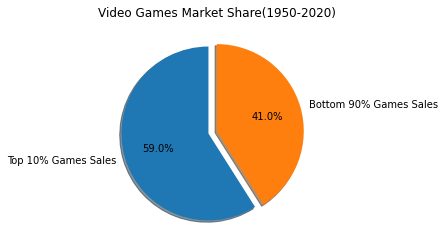

In [308]:
labels = ['Top 10% Games Sales', 'Bottom 90% Games Sales']
sizes = [59,41]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode,  labels = labels, autopct = '%1.1f%%', shadow=True, startangle=90)
plt.title('Video Games Market Share(1950-2020)')
plt.show()

In [309]:
Sales_Descending = Sales_Descending.iloc[:1624]
Sales_Descending[['Name', 'Publisher', 'Total_Sales']].head(10)

,Name,Publisher,Total_Sales
0,Wii Sports,Nintendo,82740000.0
1,Super Mario Bros.,Nintendo,40240000.0
2,Mario Kart Wii,Nintendo,35830000.0
3,Wii Sports Resort,Nintendo,33000000.0
4,Pokemon Red/Pokemon Blue,Nintendo,31380000.0
5,Tetris,Nintendo,30260000.0
6,New Super Mario Bros.,Nintendo,30010000.0
7,Wii Play,Nintendo,29010000.0
8,New Super Mario Bros. Wii,Nintendo,28610000.0
9,Duck Hunt,Nintendo,28310000.0


### 2-3-(2) 메인 퍼블리셔(업체) 조사

In [310]:
#이어 메인 게임업체(Publisher)에 대해 알아보고자 했다.
major_publisher_sales = Sales_Descending.groupby('Publisher').Total_Sales.sum()
major_publisher_sales = pd.DataFrame(major_publisher_sales)
major_publisher = major_publisher_sales.reset_index()
major_publisher['Total_Sales'] = major_publisher['Total_Sales'] / 1000000 
major_publisher.sort_values(by = 'Total_Sales', ascending= False)

,Publisher,Total_Sales
48,Nintendo,1585.62
22,Electronic Arts,645.48
7,Activision,451.93
58,Sony Computer Entertainment,402.45
66,Take-Two Interactive,291.12
...,...,...
60,Sony Online Entertainment,1.28
0,3DO,1.28
47,Natsume,1.26
52,RTL,1.25


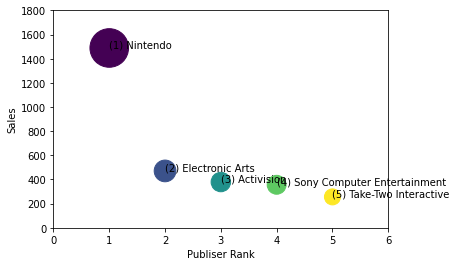

In [311]:
#하기와 같이 상위 5업체를 추려보았으며, 버블  플롯으로 시각화 하였다. 업계 1위 닌텐도는 뒤를 잇는 4개 업체 매출합보다 매출액이 크다.

publisher_name = ['Nintendo', 'Electronic Arts', 'Activision', 'Sony Computer Entertainment', 'Take-Two Interactive']
publisher_sales = [1488.66, 470.82, 378.97, 356.10, 255.90]
publisher_rank = [1,2,3,4,5]

fig, ax = plt.subplots()
ax.scatter(publisher_rank, publisher_sales, s = publisher_sales, marker = 'o', c = publisher_rank)

for i in range(len(publisher_rank)):
  plt.annotate("({}) {}".format(i+1,publisher_name[i]), xy= (publisher_rank[i], publisher_sales[i]))

plt.xlim(0,6)
plt.ylim(0,1800)
plt.ylabel('Sales')
plt.xlabel('Publiser Rank')
plt.show();


###2-3-(3)  인기 플랫폼, 장르, 시장 조사

In [312]:
platform = Sales_Descending.groupby('Platform').Name.count().sort_values(ascending = False)
#platform = platform.reset_index()
platform = platform.iloc[:10]
platform

Platform
PS2     263
X360    193
PS3     190
PS      152
Wii     124
DS      116
PS4      61
NES      56
PC       56
GBA      54
Name: Name, dtype: int64

In [313]:
Genre = Sales_Descending.groupby('Genre').Name.count().sort_values(ascending = False)
#Genre = Genre.reset_index()
Genre = Genre.iloc[:10]
Genre

Genre
Action          329
Sports          232
Shooter         203
Role-Playing    171
Platform        155
Racing          134
Misc            134
Fighting         98
Simulation       70
Puzzle           44
Name: Name, dtype: int64

In [314]:
tidy = Sales_Descending[['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].melt(id_vars = 'Name', var_name = 'region', value_name ='sales')
tidy_sales = tidy.groupby('region').sales.sum()
tidy_sales = tidy_sales.sort_values(ascending= False)

tidy_sales

region
NA_Sales       2.522050e+09
EU_Sales       1.505280e+09
JP_Sales       6.471300e+08
Other_Sales    4.834900e+08
Name: sales, dtype: float64

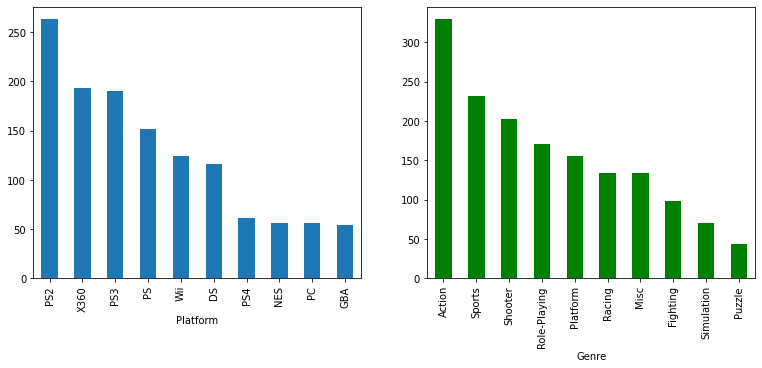

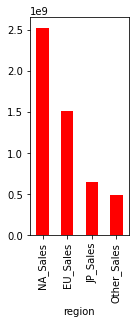

In [315]:
plt.figure(figsize = (20,5))

plt.subplot(131)
platform.plot(kind = 'bar')

plt.subplot(132)
Genre.plot(kind = 'bar', color = 'g')
plt.show()

plt.subplot(133)
tidy_sales.plot(kind = 'bar', color = 'r')

plt.show();

In [316]:
#전체 매출액의 59%를 차지하는 데이터를 분석해보면,
#플랫폼, 장르, 지역판매량을 순위대로 top3를 상기 및 하기와 같이 꼽아볼 수 있다. 
#따라서 다음 분기 게임 기획을 위해서는 하기 데이터를 참고하여, 게임 플랫폼 및 장르, 타겟 지역군에 우선순위를 두는 것이 매출향상에 유리하다.

print('매출 상위 10% 게임(1624 종목)의 플랫폼, 장르, 출고 지역추이')
print('------------------------------------------------')
print('단위: 개', platform[0:3])
print('------------------------------------------------')
print('단위: 개', Genre[0:3])
print('------------------------------------------------')
print('단위: 달러', tidy_sales[0:3])

매출 상위 10% 게임(1624 종목)의 플랫폼, 장르, 출고 지역추이
------------------------------------------------
단위: 개 Platform
PS2     263
X360    193
PS3     190
Name: Name, dtype: int64
------------------------------------------------
단위: 개 Genre
Action     329
Sports     232
Shooter    203
Name: Name, dtype: int64
------------------------------------------------
단위: 달러 region
NA_Sales    2.522050e+09
EU_Sales    1.505280e+09
JP_Sales    6.471300e+08
Name: sales, dtype: float64


#개인과제 

## 어떤 조합으로 게임을 기획해야 할까?
앞서 2-1에서는 **지역**별로 선호하는 게임 장르가 다름을 확인하였고, <br>
2-2 에서는 **연도**별로 선호하는 게임 트랜드가 다른 것을 확인하였다. <br>

시간도 예산도 촉박하여, 지역과 게임 장르, 플랫폼을 각각 1가지만 선택할 수 있을 때 최대의 이익을 창출할 수 있는 조합을 찾아보자.

`연도의 트랜드를 반영하여, 관련 데이터는 최근 10개년으로 추려보았다(2-2 카이제곱 검정으로 연도별로 선호 장르, 플랫폼이 유의하게 연관이 있을 것임을 확인하였다).`

In [317]:
final = games_EDA.loc[:][games_EDA['Year'] >= 2010]
final

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0,20000.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0,40000.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0,250000.0
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,20000.0,10000.0,0.0,0.0,30000.0
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,40000.0,30000.0,0.0,10000.0,80000.0
...,...,...,...,...,...,...,...,...,...,...
16581,LEGO The Hobbit,XOne,2014.0,Action,Warner Bros. Interactive Entertainment,130000.0,120000.0,0.0,20000.0,270000.0
16588,MindJack,PS3,2011.0,Shooter,Square Enix,70000.0,80000.0,0.0,30000.0,180000.0
16590,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010.0,Adventure,Aqua Plus,0.0,0.0,50000.0,0.0,50000.0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0,790000.0


In [318]:
#북아메리카에서 판매할 때 최고의 조합 
conditions = (final['NA_Sales'] > 0)
target_NA = final[conditions]
target_NA = target_NA.groupby(['Genre','Platform']).NA_Sales.sum().reset_index()

In [319]:
target_NA.head()

,Genre,Platform,NA_Sales
0,Action,3DS,19310000.0
1,Action,DS,13040000.0
2,Action,PC,6650000.0
3,Action,PS2,580000.0
4,Action,PS3,73930000.0


In [320]:
NA_List = target_NA.Genre.unique()

list_NA = []

for i in NA_List:
  x = target_NA[(target_NA['Genre'] == i)].NA_Sales.max()
  y = target_NA[(target_NA['NA_Sales'] == x)].index.values
  list_NA.append(y)

list_NA

[array([10]),
 array([15]),
 array([27]),
 array([43]),
 array([55]),
 array([60]),
 array([75]),
 array([86]),
 array([98]),
 array([100]),
 array([121]),
 array([125])]

In [321]:
target_NA = target_NA.iloc[[10,15,27,43,55,60,75,86,98,100,121,125]].sort_values(by='NA_Sales', ascending = False)
target_NA

,Genre,Platform,NA_Sales
98,Shooter,X360,98570000.0
10,Action,X360,81930000.0
121,Sports,X360,52100000.0
43,Misc,Wii,46470000.0
86,Role-Playing,X360,23210000.0
55,Platform,Wii,15680000.0
75,Racing,X360,12020000.0
27,Fighting,PS3,11470000.0
100,Simulation,3DS,7010000.0
15,Adventure,PS3,6290000.0


In [322]:
#유럽, 일본, 그 외 지역도 동일하게 처리

conditions2 = (final['EU_Sales'] > 0)
target_EU = final[conditions2]
target_EU = target_EU.groupby(['Genre','Platform']).EU_Sales.sum().reset_index()

EU_List = target_EU.Genre.unique()

list_EU = []

for i in EU_List:
  x = target_EU[(target_EU['Genre'] == i)].EU_Sales.max()
  y = target_EU[(target_EU['EU_Sales'] == x)].index.values
  list_EU.append(y)

list_EU

[array([4]),
 array([15]),
 array([26]),
 array([42]),
 array([46]),
 array([59]),
 array([68]),
 array([79]),
 array([91]),
 array([101]),
 array([113]),
 array([123])]

In [323]:
target_EU = target_EU.iloc[[4,15,26,42,46,59,68,79,91,101,113,123]].sort_values(by='EU_Sales', ascending = False)
target_EU

,Genre,Platform,EU_Sales
4,Action,PS3,75780000.0
91,Shooter,PS3,52190000.0
113,Sports,PS3,33880000.0
42,Misc,Wii,24640000.0
68,Racing,PS3,18680000.0
79,Role-Playing,PS3,14210000.0
46,Platform,3DS,10350000.0
101,Simulation,PC,9370000.0
123,Strategy,PC,8810000.0
26,Fighting,PS3,7360000.0


In [324]:
conditions3 = (final['JP_Sales'] > 0)
target_JP = final[conditions3]
target_JP = target_JP.groupby(['Genre','Platform']).JP_Sales.sum().reset_index()

JP_List = target_JP.Genre.unique()

list_JP = []

for i in JP_List:
  x = target_JP[(target_JP['Genre'] == i)].JP_Sales.max()
  y = target_JP[(target_JP['JP_Sales'] == x)].index.values
  list_JP.append(y)

list_JP

[array([0]),
 array([16]),
 array([23]),
 array([31]),
 array([42]),
 array([50]),
 array([56]),
 array([65]),
 array([77]),
 array([85]),
 array([96]),
 array([108])]

In [325]:
target_JP = target_JP.iloc[[0,16,23,31,42,50,56,65,77,85,96,108]].sort_values(by='JP_Sales', ascending = False)
target_JP

,Genre,Platform,JP_Sales
65,Role-Playing,3DS,35240000.0
0,Action,3DS,22050000.0
85,Simulation,3DS,10320000.0
77,Shooter,PS3,7260000.0
42,Platform,3DS,6450000.0
16,Adventure,PSP,5880000.0
31,Misc,3DS,5380000.0
96,Sports,PS3,5260000.0
23,Fighting,PS3,5040000.0
56,Racing,3DS,2810000.0


In [326]:
conditions4 = (final['Other_Sales'] > 0)
target_Others = final[conditions4]
target_Others = target_Others.groupby(['Genre','Platform']).Other_Sales.sum().reset_index()

Others_List = target_Others.Genre.unique()

list_Others = []

for i in Others_List:
  x = target_Others[(target_Others['Genre'] == i)].Other_Sales.max()
  y = target_Others[(target_Others['Other_Sales'] == x)].index.values
  list_Others.append(y)

list_Others

[array([4]),
 array([15]),
 array([25, 76]),
 array([40]),
 array([ 44, 121]),
 array([ 57, 100]),
 array([66]),
 array([77]),
 array([89]),
 array([99]),
 array([111]),
 array([ 44, 121])]

In [327]:
target_Others = target_Others.iloc[[4,15,25,76,40,44,121,57,100,66,77,89,99,111]].sort_values(by='Other_Sales', ascending = False)
target_Others

,Genre,Platform,Other_Sales
4,Action,PS3,31100000.0
89,Shooter,PS3,20080000.0
111,Sports,PS3,13880000.0
66,Racing,PS3,7380000.0
40,Misc,Wii,6830000.0
77,Role-Playing,PS3,6190000.0
25,Fighting,PS3,3260000.0
76,Role-Playing,PC,3260000.0
15,Adventure,PS3,2410000.0
44,Platform,3DS,2260000.0


In [328]:
target_NA.loc[[98]]

,Genre,Platform,NA_Sales
98,Shooter,X360,98570000.0


In [329]:
array = [['North America','Shooter', 'X360', 98570000.0],
['EU', 'Action', 'PS3', 75780000.0],
['Japan', 'Role-Playing', '3DS', 35240000.0],
['Others', 'Action', 'PS3', 31100000.0]]
col = ['Target Region', 'Genre', 'Platform', 'Sales_Total for past 10 yrs']

Total_Summary = pd.DataFrame(array,columns=col)

#NA 지역에는 Shooter의 X360을,
#EU 지역을 타겟으로 할 때는 PS3 유저를 겨냥한 Action 게임을
#일본 지역을 노릴때는 Role-Playing 장르에 3DS를 통한 게임을
#그 외 지역을 노릴 때는 Action 장르의 PS3 게임을 기획해야 한다.


In [330]:
m_values = Total_Summary['Sales_Total for past 10 yrs'].values/1000000
Total_Summary['In Million $'] = m_values
Total_Summary

#가장 큰 시장 규모의 NA- Shooter - X360을 타겟으로 하는 것이 좋겠으나,
#단일 시장이 아닌 다양한 국가를 타겟으로 출시 및 마케팅, 배포 여력이 있다면, Action 장르의 PS3를 기획하는 것이 좋겠다. 이 경우 지난 10년간 EU와 그 외 지역에서의 매출액은 75.78M +  31.1M = 106.88 M 으로 북아메리카 단일시장, Shooter + X360 게임의 98.57 M 을 뛰어넘는 수치이기 때문이다.

,Target Region,Genre,Platform,Sales_Total for past 10 yrs,In Million $
0,North America,Shooter,X360,98570000.0,98.57
1,EU,Action,PS3,75780000.0,75.78
2,Japan,Role-Playing,3DS,35240000.0,35.24
3,Others,Action,PS3,31100000.0,31.10


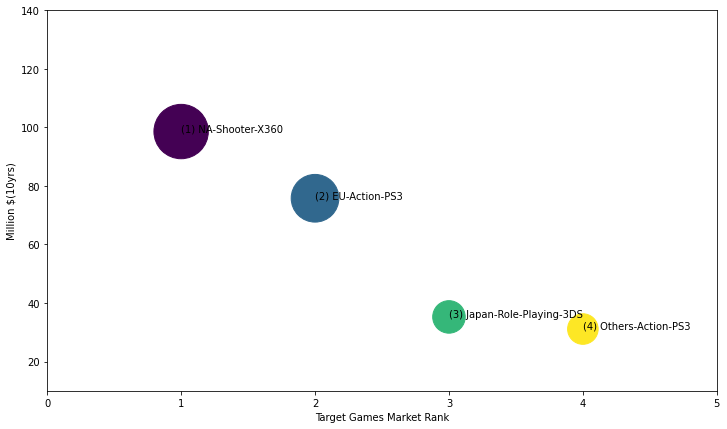

In [331]:
summary_name = ['NA-Shooter-X360', 'EU-Action-PS3', 'Japan-Role-Playing-3DS', 'Others-Action-PS3']
summary_sales = (Total_Summary['Sales_Total for past 10 yrs'].values) / 1000000
summary_rank = [1,2,3,4]

fig, ax = plt.subplots(figsize = (12,7))
ax.scatter(summary_rank, summary_sales, s = summary_sales*30, marker = 'o', c = summary_rank, )

for i in range(len(summary_rank)):
  plt.annotate("({}) {}".format(i+1,summary_name[i]), xy= (summary_rank[i], summary_sales[i]))

plt.xlim(0,5)
plt.ylim(10,140)
plt.xlabel('Target Games Market Rank')
plt.ylabel('Million $(10yrs)')
plt.show();

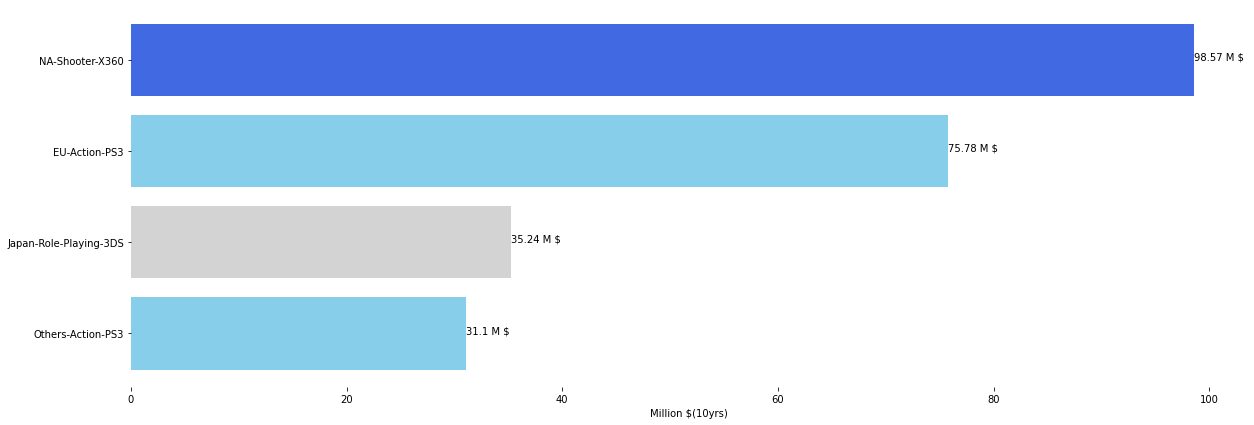

In [332]:
summary_name = ['Others-Action-PS3', 'Japan-Role-Playing-3DS','EU-Action-PS3','NA-Shooter-X360' ]
s = (Total_Summary['Sales_Total for past 10 yrs'].values) / 1000000
s = s[::-1]
summary_rank = ['Others-Action-PS3', 'Japan-Role-Playing-3DS','EU-Action-PS3','NA-Shooter-X360' ]

fig, ax = plt.subplots(figsize = (20,7))
ax.barh(summary_rank, s, color=['skyblue', 'lightgrey', 'skyblue', 'royalblue'])

for i in range(len(summary_rank)):
  plt.annotate("{} M $".format(s[i]), xy= (s[i], summary_rank[i]))

plt.box(False)
#fig.patch.set_visible(False)
#ax.axis('off')
plt.xlabel('Million $(10yrs)')
plt.show();

In [333]:
import numpy as np
s = (Total_Summary['Sales_Total for past 10 yrs'].values) / 1000000
s = s[::-1]
s

array([31.1 , 35.24, 75.78, 98.57])